In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [30]:
glaxo = pd.read_csv("GLAXO.csv")
beml = pd.read_csv("BEML.csv")

In [31]:
glaxo.head(1)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.0,1629.1,1602.0,1629.0,1625.65,9365.0,151.74


In [32]:
glaxo=glaxo[["Date","Close"]]
beml=beml[["Date","Close"]]

In [33]:
glaxo

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [34]:
(1616.80-1625.65)/1625.65

-0.005443976255651669

In [35]:
beml

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


### 1 day return

In [36]:
glaxo["gain"]=glaxo["Close"].pct_change()
beml["gain"]=beml["Close"].pct_change()

In [37]:
glaxo

,Date,Close,gain
0,2010-01-04,1625.65,NaN
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398
...,...,...,...
1734,2016-12-26,2723.50,-0.001283
1735,2016-12-27,2701.75,-0.007986
1736,2016-12-28,2702.15,0.000148
1737,2016-12-29,2727.90,0.009529


In [38]:
beml

,Date,Close,gain
0,2010-01-04,1135.60,NaN
1,2010-01-05,1134.60,-0.000881
2,2010-01-06,1139.60,0.004407
3,2010-01-07,1144.15,0.003993
4,2010-01-08,1144.05,-0.000087
...,...,...,...
1734,2016-12-26,950.25,-0.021924
1735,2016-12-27,975.70,0.026782
1736,2016-12-28,974.40,-0.001332
1737,2016-12-29,986.05,0.011956


### 2. variance of the stocks

In [40]:
glaxo["gain"].var()

0.0001785039904062476

In [41]:
beml["gain"].var()

0.0006985888521149214

C:\Users\HP\AppData\Local\Temp\ipykernel_23916\4187835303.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


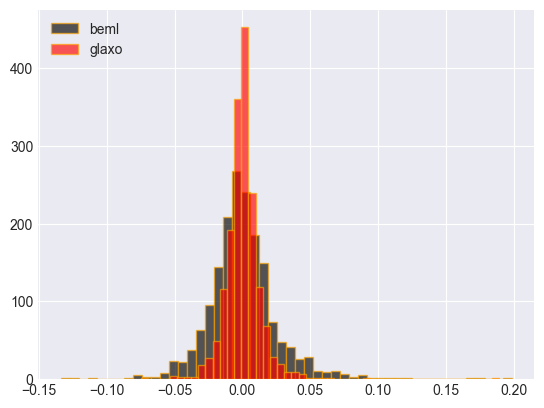

In [46]:
plt.style.use("seaborn-darkgrid")
plt.hist(beml["gain"],bins=50,label="beml",color="black",edgecolor="orange",alpha=0.65)
plt.hist(glaxo["gain"],bins=50,label="glaxo",color="red",edgecolor="orange",alpha=0.65)
plt.legend(loc="upper left")
plt.show()

### profit of >2%

In [49]:
stats.norm.cdf(1) # left side of area # cumulative distribution function

0.8413447460685429

In [56]:
stats.norm.sf(1) # right side of area # survival function

0.15865525393145707

In [51]:
stats.norm.sf(0.02,beml["gain"].mean(),beml["gain"].std()) # right side of area

0.22769829484075343

- 22% of chances is there for beml company will give you 2% of gain

In [52]:
stats.norm.sf(0.02,glaxo["gain"].mean(),glaxo["gain"].std()) # right side of area

0.07104511457618568

- 7% of chances is there for beml company will give you 2% of gain

### loss of >2% == gain<-2%

In [54]:
stats.norm.cdf(-0.02,beml["gain"].mean(),beml["gain"].std())

0.22155987503755292

In [55]:
stats.norm.cdf(-0.02,glaxo["gain"].mean(),glaxo["gain"].std())

0.06352488667177397

- for beml company will higher losses and as well as higher gain, and glaxo will give moderate loss and moderate gain, so glaxo is the more stable company